## Convolutional Neural Network
### by Patrapee Pongtana

Prerequisite: You must run Jupyter Notebook while you're under Tensorflow environment from the terminal

Import necessary libraries

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Load the data from MNIST database:

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now, we can see the sample data:

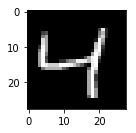

In [3]:
plt.subplot(221)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray')) # Sample 3 out of 60000

Randomize the seed so we can reproduce the result:

In [4]:
seed = 5
numpy.random.seed(seed)

Given X_train dataset. The following is the features of the array X_train:

In [5]:
#X_train.shape[0] = total samples = 60000
#X_train.shape[1] = width of the picture = 28
#X_train.shape[2] = height of the picture = 28

Turn the shape of the dataset into a vector of a vector. Row of 60000 samples and 784 (28*28) columns:

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

Normalize all input pixels from 0-255 (RGB) to 0-1:

In [7]:
X_train = X_train / 255
X_test = X_test / 255

Convert 1 dimensional label into 10 dimensional labels:

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Now we can create an architecture function:

    30 Convolutional Layers Map. Size 5 x 5
    Max pooling 2 x 2
    15 Convolutional Layers Map. Size 3 x 3
    Max pooling 2 x 2
    Dropout layer with 20% to reduce overfitting of data
    Flat layer for connecting
    Fully connected layer with 128 neurons and relu
    Fully connected layer with 50 neurons with relu
    Output the neurons with softmax activation function
    Compile the current model and then return

In [9]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Now we can fit all of our data into the model:

In [10]:
model = CNN_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Percentage of accuracy: %.2f%%' % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.3807 - acc: 0.8836 - val_loss: 0.0832 - val_acc: 0.9750
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0958 - acc: 0.9698 - val_loss: 0.0477 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0714 - acc: 0.9776 - val_loss: 0.0458 - val_acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0571 - acc: 0.9822 - val_loss: 0.0314 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0492 - acc: 0.9844 - val_loss: 0.0396 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0436 - acc: 0.9860 - val_loss: 0.0291 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0312 - val_ac